In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_homicidios = pd.read_excel(
    'homicidios.xlsx', sheet_name='HECHOS')

In [3]:
df_lesiones = pd.read_excel(
    'lesiones.xlsx', sheet_name='HECHOS')

In [4]:
df_vict_les = pd.read_excel(
    'Victimas - Lesiones.xlsx', sheet_name='VICTIMAS')

In [5]:
df_vict = pd.read_excel(
    'Victimas.xlsx', sheet_name='VICTIMAS')

In [6]:
df_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

El comando "df_homicidios.info()" muestra información sobre el DataFrame "df_homicidios", como el número de filas y columnas, el nombre y tipo de datos de cada columna, y la cantidad de memoria utilizada.

In [7]:
df_lesiones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23785 entries, 0 to 23784
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    23785 non-null  object 
 1   n_victimas            23785 non-null  int64  
 2   aaaa                  23785 non-null  int64  
 3   mm                    23785 non-null  int64  
 4   dd                    23785 non-null  int64  
 5   fecha                 23785 non-null  object 
 6   hora                  23785 non-null  object 
 7   franja_hora           23780 non-null  object 
 8   comuna                23616 non-null  object 
 9   tipo_calle            23785 non-null  object 
 10  otra_direccion        23785 non-null  object 
 11  calle                 12867 non-null  object 
 12  altura                12771 non-null  float64
 13  cruce                 9407 non-null   object 
 14  geocodificacion_CABA  23746 non-null  object 
 15  longitud           

In [8]:
df_vict_les.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27605 entries, 0 to 27604
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID hecho          27605 non-null  object        
 1   AAA               27605 non-null  int64         
 2   MM                27605 non-null  int64         
 3   DD                27605 non-null  int64         
 4   FECHA             27605 non-null  datetime64[ns]
 5   VEHICULO_VICTIMA  27605 non-null  object        
 6   SEXO              27605 non-null  object        
 7   EDAD_VICTIMA      27605 non-null  object        
 8   GRAVEDAD          27605 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 1.9+ MB


In [9]:
df_vict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [10]:
df_homicidios.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [11]:
df_homicidios = df_homicidios.fillna(0)
df_homicidios

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,0.0,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,0.0,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,0,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,0.0,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,0.0,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,0.0,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,0.0,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,0.0,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071.0,0,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


El código  `df_homicidios = df_homicidios.fillna(0)`  se utiliza para rellenar los valores faltantes en el DataFrame  `df_homicidios`  con ceros. Esto significa que si hay alguna celda vacía en el DataFrame, se llenará con el valor 0. 

In [12]:
# Agrupa los datos por las columnas "N_VICTIMAS" y "AAAA" y calcula la sumatoria de víctimas
victimasxanio = df_homicidios.groupby(['N_VICTIMAS', 'AAAA'])['N_VICTIMAS'].sum()

# Imprime la sumatoria de víctimas por año
print(victimasxanio)

N_VICTIMAS  AAAA
1           2016    142
            2017    123
            2018    137
            2019    102
            2020     75
            2021     97
2           2016      4
            2017     14
            2018     12
            2019      2
            2020      6
3           2017      3
Name: N_VICTIMAS, dtype: int64


El código agrupa los datos del DataFrame "df_homicidios" por las columnas "N_VICTIMAS" y "AAAA" y luego calcula la sumatoria de víctimas para cada combinación de valores de estas dos columnas. 

Luego, se imprime la sumatoria de víctimas por año.

In [13]:
# Agrupa los datos por las columnas "N_VICTIMAS" y "AAAA" y calcula la sumatoria de víctimas
victimas = df_homicidios.groupby(['N_VICTIMAS', 'VICTIMA'])['N_VICTIMAS'].sum()

# Imprime la sumatoria de víctimas por año
print(victimas)

N_VICTIMAS  VICTIMA    
1           AUTO            75
            BICICLETA       29
            CARGAS           7
            MOTO           288
            MOVIL            1
            PASAJEROS        5
            PEATON         262
            SD               9
2           AUTO            14
            MOTO            14
            MOVIL            2
            OBJETO FIJO      2
            PEATON           4
            PEATON_MOTO      2
3           AUTO             3
Name: N_VICTIMAS, dtype: int64


In [14]:
# Agrupa los datos por las columnas "N_VICTIMAS" y "AAAA" y calcula la sumatoria de víctimas
acusados = df_homicidios.groupby(['N_VICTIMAS', 'ACUSADO'])['N_VICTIMAS'].sum()

# Imprime la sumatoria de víctimas por año
print(acusados)


N_VICTIMAS  ACUSADO    
1           AUTO           198
            BICICLETA        7
            CARGAS         142
            MOTO            56
            MULTIPLE        17
            OBJETO FIJO     58
            OTRO             6
            PASAJEROS      168
            SD              23
            TREN             1
2           AUTO            12
            CARGAS           8
            MOTO             2
            OBJETO FIJO      6
            PASAJEROS       10
3           OBJETO FIJO      3
Name: N_VICTIMAS, dtype: int64


In [15]:
agrupado_homicidios = df_homicidios.groupby(['N_VICTIMAS', 'VICTIMA', 'ACUSADO'])['N_VICTIMAS'].sum()
agrupado_homicidios

N_VICTIMAS  VICTIMA      ACUSADO    
1           AUTO         AUTO            29
                         CARGAS          13
                         MULTIPLE         3
                         OBJETO FIJO     17
                         OTRO             1
                         PASAJEROS        8
                         SD               4
            BICICLETA    AUTO             8
                         CARGAS          10
                         MULTIPLE         1
                         OTRO             1
                         PASAJEROS        8
                         TREN             1
            CARGAS       AUTO             1
                         CARGAS           4
                         OBJETO FIJO      1
                         PASAJEROS        1
            MOTO         AUTO            82
                         BICICLETA        2
                         CARGAS          76
                         MOTO            25
                         MULTIPLE      

In [16]:
df_lesiones.tail()

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,comuna,tipo_calle,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
23780,LC-2021-0652849,1,2021,12,31,2021-12-31 00:00:00,19:30:00,19,9,AVENIDA,...,-34.659713573880,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23781,LC-2021-0652865,2,2021,12,31,2021-12-31 00:00:00,19:40:00,19,9,AVENIDA,...,-34.641753304864,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23782,LC-2021-0652907,1,2021,12,31,2021-12-31 00:00:00,20:00:00,20,1,SD,...,-34.583083,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23783,LC-2021-0652921,1,2021,12,31,2021-12-31 00:00:00,22:00:00,22,5,CALLE,...,-34.614288229345,MOTO,TRANSPORTE PUBLICO,MOTO-TRANSPORTE PUBLICO,x,0,x,0,0,GRAVE
23784,LC-2020-0244615,1,2020,5,17,5/17/2020,21:00:00,21,SD,SD,...,-3472890716,MOTO,AUTO,MOTO-AUTO,x,x,0,0,0,SD


In [17]:
columnas_eliminar = ['moto', 'auto', 'transporte_publico', 'camion', 'ciclista']
df_lesiones = df_lesiones.drop(columnas_eliminar, axis = 1)
df_lesiones.head()

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,comuna,tipo_calle,...,calle,altura,cruce,geocodificacion_CABA,longitud,latutid,victima,acusado,participantes,gravedad
0,LC-2019-0000179,1,2019,1,1,2019-01-01 00:00:00,09:00:00,9,14,SD,...,NaN,NaN,NaN,Point (104991.46333918849995825 107720.9664748...,-58.408911,-34.559658,CICLISTA,SD,CICLISTA-SD,SD
1,LC-2019-0000053,1,2019,1,1,2019-01-01 00:00:00,01:55:00,1,8,SD,...,NaN,NaN,NaN,Point (101813.84712503915943671 95578.55507230...,-58.44351,-34.669125,AUTO,SD,AUTO-SD,SD
2,LC-2019-0000063,1,2019,1,1,2019-01-01 00:00:00,02:00:00,2,8,SD,...,NaN,NaN,NaN,Point (99538.58660300650808495 94643.418717990...,-58.468335,-34.677556,SD,SD,SD-SD,SD
3,LC-2019-0000079,1,2019,1,1,2019-01-01 00:00:00,02:30:00,2,7,SD,...,NaN,NaN,NaN,Point (102372.16830963784013875 97994.13750300...,-58.437425,-34.647349,PEATON,SD,PEATON-SD,SD
4,LC-2019-0000082,4,2019,1,1,2019-01-01 00:00:00,04:30:00,4,3,SD,...,NaN,NaN,NaN,Point (105968.98286849579017144 102737.1734686...,-58.398225,-34.604579,AUTO,SD,AUTO-SD,SD


El código elimina las columnas 'moto', 'auto', 'transporte_publico', 'camion' y 'ciclista' del DataFrame df_lesiones. Luego muestra las primeras filas del DataFrame resultante.

In [18]:
df_lesiones = df_lesiones.fillna(0)
df_lesiones.head()

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,comuna,tipo_calle,...,calle,altura,cruce,geocodificacion_CABA,longitud,latutid,victima,acusado,participantes,gravedad
0,LC-2019-0000179,1,2019,1,1,2019-01-01 00:00:00,09:00:00,9,14,SD,...,0,0.0,0,Point (104991.46333918849995825 107720.9664748...,-58.408911,-34.559658,CICLISTA,SD,CICLISTA-SD,SD
1,LC-2019-0000053,1,2019,1,1,2019-01-01 00:00:00,01:55:00,1,8,SD,...,0,0.0,0,Point (101813.84712503915943671 95578.55507230...,-58.44351,-34.669125,AUTO,SD,AUTO-SD,SD
2,LC-2019-0000063,1,2019,1,1,2019-01-01 00:00:00,02:00:00,2,8,SD,...,0,0.0,0,Point (99538.58660300650808495 94643.418717990...,-58.468335,-34.677556,SD,SD,SD-SD,SD
3,LC-2019-0000079,1,2019,1,1,2019-01-01 00:00:00,02:30:00,2,7,SD,...,0,0.0,0,Point (102372.16830963784013875 97994.13750300...,-58.437425,-34.647349,PEATON,SD,PEATON-SD,SD
4,LC-2019-0000082,4,2019,1,1,2019-01-01 00:00:00,04:30:00,4,3,SD,...,0,0.0,0,Point (105968.98286849579017144 102737.1734686...,-58.398225,-34.604579,AUTO,SD,AUTO-SD,SD


In [19]:
df_vict

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
1,2016-0022,2016-02-21,2016,2,21,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,41,SD
2,2016-0027,2016-02-28,2016,2,28,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,34,SD
3,2016-0031,2016-03-08,2016,3,8,CONDUCTOR,MOTO,MASCULINO,21,SD
4,2016-0045,2016-04-11,2016,4,11,CONDUCTOR,MOTO,MASCULINO,SD,SD
...,...,...,...,...,...,...,...,...,...,...
712,2016-0009,2016-01-24,2016,1,24,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,29,2016-01-26 00:00:00
713,2016-0008,2016-01-24,2016,1,24,CONDUCTOR,MOTO,MASCULINO,30,2016-01-24 00:00:00
714,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
715,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00


In [20]:
def sumatoria_victimas_por_victima(df, mes):
    df_filtrado = df[df['MM'] == mes]  # Filtrar el DataFrame para el mes especificado
    sumatoria_por_victima = df_filtrado.groupby('VICTIMA')['N_VICTIMAS'].sum()  # Agrupar por "VICTIMA" y calcular la suma de "N_VICTIMAS"
    return sumatoria_por_victima

La función "sumatoria_victimas_por_victima" toma como parámetros de entrada un DataFrame y un mes. Filtra el DataFrame para seleccionar solo las filas correspondientes al mes especificado. Luego, agrupa los datos filtrados por la columna "VICTIMA" y calcula la suma de la columna "N_VICTIMAS" para cada grupo. Finalmente, devuelve un objeto de tipo Series con la suma de víctimas para cada víctima.

In [21]:
mes = 5  # Ejemplo de número de mes
resultado = sumatoria_victimas_por_victima(df_homicidios, mes)
resultado

VICTIMA
AUTO          5
BICICLETA     3
CARGAS        1
MOTO         21
PEATON       30
Name: N_VICTIMAS, dtype: int64

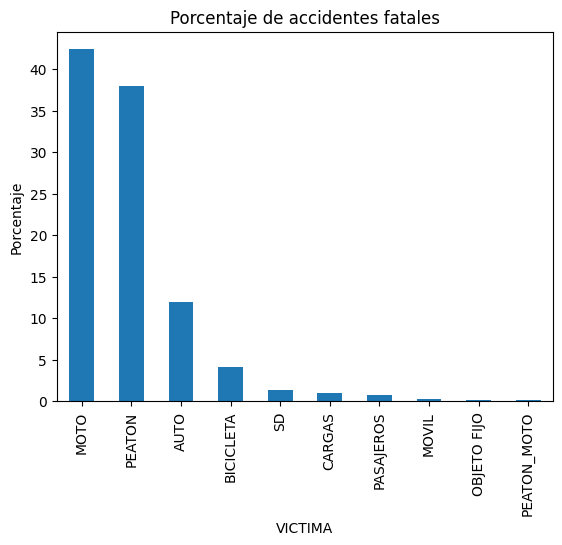

In [22]:
conteos_victima = df_homicidios['VICTIMA'].value_counts()

porcentajes = (conteos_victima / len(df_homicidios)) * 100

porcentajes.plot(kind='bar')

plt.xlabel('VICTIMA')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de accidentes fatales')

plt.show()

El código anterior genera un gráfico de barras para visualizar el porcentaje de diferentes tipos de víctimas en el dataset. Se utiliza la columna 'VICTIMA' en el DataFrame 'df_homicidios' para contar las ocurrencias de cada tipo de víctima. Los conteos se dividen por el número total de filas en el DataFrame y se multiplican por 100 para obtener el porcentaje. Los porcentajes resultantes se representan como barras en el gráfico de barras.

El eje x del gráfico representa los diferentes tipos de víctimas, mientras que el eje y representa el porcentaje. El título del gráfico es "Porcentaje de accidentes fatales". El gráfico ayuda a comprender la distribución de los tipos de víctimas y sus frecuencias relativas en el dataset.

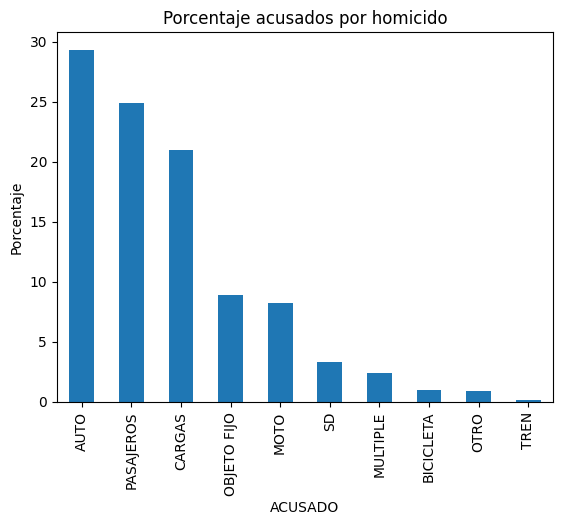

In [23]:
conteos_victima = df_homicidios['ACUSADO'].value_counts()

porcentajes = (conteos_victima / len(df_homicidios)) * 100

porcentajes.plot(kind='bar')

plt.xlabel('ACUSADO')
plt.ylabel('Porcentaje')
plt.title('Porcentaje acusados por homicido')

plt.show()


El código anterior genera un gráfico de barras del porcentaje de individuos acusados en casos de homicidio. La variable "conteos_victima" cuenta la cantidad de veces que aparece cada individuo acusado en el dataset, mientras que "porcentajes" calcula el porcentaje de cada individuo acusado sobre el total de casos. El gráfico resultante muestra el porcentaje de cada individuo acusado, con el eje x representando al individuo acusado y el eje y representando el porcentaje. El gráfico está etiquetado con un título, etiqueta x y etiqueta y para proporcionar contexto.

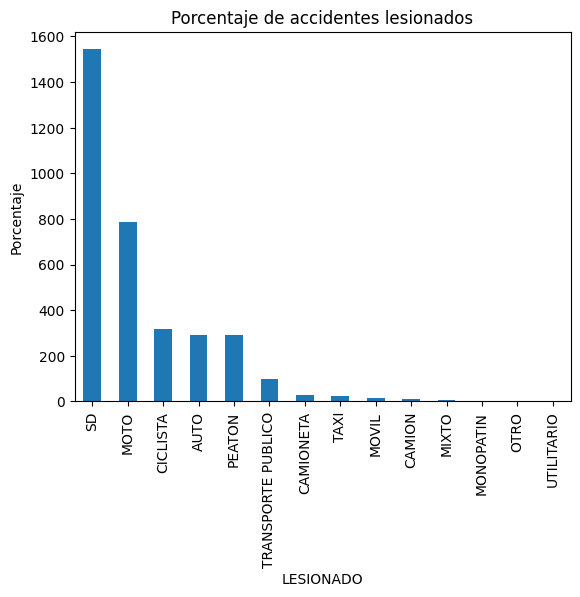

In [24]:
conteos_victima = df_lesiones['victima'].value_counts()

porcentajes = (conteos_victima / len(df_homicidios)) * 100

porcentajes.plot(kind='bar')

plt.xlabel('LESIONADO')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de accidentes lesionados')

plt.show()

El código calcula la frecuencia de los diferentes tipos de víctimas en un conjunto de datos llamado 'df_lesiones' y luego lo convierte en porcentajes. Luego, crea un gráfico de barras para visualizar el porcentaje de los diferentes tipos de víctimas en el conjunto de datos. El eje x representa los diferentes tipos de víctimas y el eje y representa el porcentaje. El título del gráfico es "Porcentaje de accidentes con lesionados".

Este gráfico nos ayuda a comprender la distribución de los diferentes tipos de víctimas en el conjunto de datos e identificar cualquier patrón o tendencia. Proporciona una representación visual de las frecuencias relativas de los diferentes tipos de víctimas en el conjunto de datos.

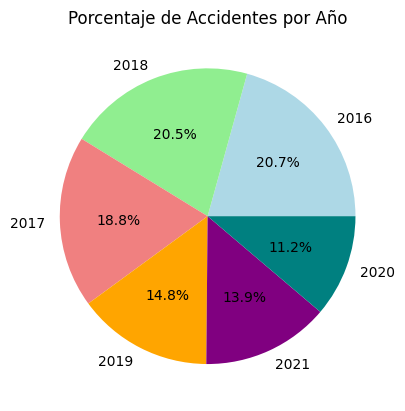

In [25]:
# Calcula los conteos de accidentes por año
conteos_anio = df_homicidios['AAAA'].value_counts()

# Calcula los porcentajes
porcentajes = (conteos_anio / len(df_homicidios)) * 100

# Configura los colores para cada porción del pastel
colores = ['lightblue', 'lightgreen', 'lightcoral', 'orange', 'purple', 'teal']

# Crea el gráfico de pastel
plt.pie(porcentajes, labels=porcentajes.index,
        colors=colores, autopct='%1.1f%%')

# Agrega un título
plt.title('Porcentaje de Accidentes por Año')

# Muestra el gráfico
plt.show()

El código calcula los conteos de accidentes por año y luego calcula los porcentajes. Utiliza estos porcentajes para crear un gráfico de pastel que muestra la distribución de accidentes por año. Los colores para cada porción del gráfico de pastel se establecen utilizando la lista 'colores'. Luego, se muestra el gráfico con un título que indica el porcentaje de accidentes por año.

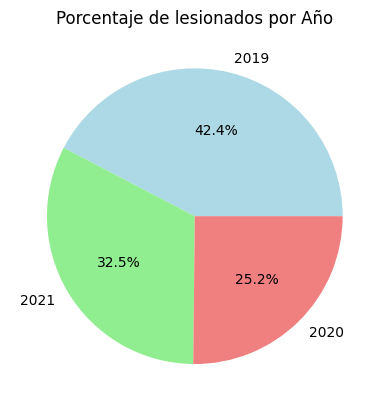

In [26]:
# Calcula los conteos de accidentes por año
conteos_anio = df_lesiones['aaaa'].value_counts()

# Calcula los porcentajes
porcentajes = (conteos_anio / len(df_lesiones)) * 100

# Configura los colores para cada porción del pastel
colores = ['lightblue', 'lightgreen', 'lightcoral', 'orange', 'purple', 'teal']

# Crea el gráfico de pastel
plt.pie(porcentajes, labels=porcentajes.index,
        colors=colores, autopct='%1.1f%%')

# Agrega un título
plt.title('Porcentaje de lesionados por Año')

# Muestra el gráfico
plt.show()


El código calcula los conteos de accidentes por año y luego calcula los porcentajes. Luego, configura los colores para cada porción del gráfico de pastel. El código crea el gráfico de pastel utilizando los porcentajes y las etiquetas, y agrega un título. Finalmente, muestra el gráfico.

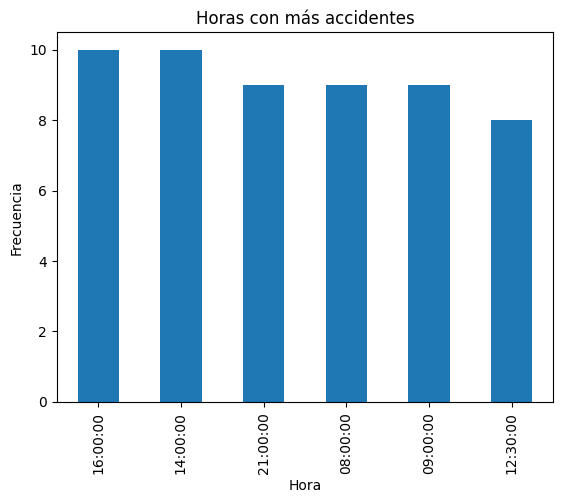

In [27]:
hora_counts = df_homicidios['HORA'].value_counts()

top_6_hours = hora_counts.head(6)

top_6_hours.plot(kind='bar')

plt.xlabel('Hora')
plt.ylabel('Frecuencia')
plt.title('Horas con más accidentes')

plt.show()

El código proporcionado genera un gráfico de barras para visualizar la frecuencia de homicidios en diferentes horas del día.

La primera línea de código calcula la frecuencia de cada hora en la columna 'HORA' del dataframe 'df_homicidios'. El resultado se almacena en la variable 'hora_counts'.

La segunda línea de código selecciona las 6 horas principales con la mayor frecuencia y las almacena en la variable 'top_6_hours'.

La tercera línea de código genera un gráfico de barras utilizando los datos de 'top_6_hours'.

La cuarta línea de código establece la etiqueta del eje x como 'Hora', la etiqueta del eje y como 'Frecuencia' y el título del gráfico como 'Horas con más accidentes'.

La quinta línea de código muestra el gráfico.

Este fragmento de código ayuda a visualizar la distribución de homicidios a lo largo del día e identificar las horas con mayor frecuencia de incidentes.

In [28]:
df_homicidios.to_csv('df_homicidios.csv', index=False)

In [29]:
df_lesiones.to_csv('df_lesiones.csv', index=False)